In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 80% !important; }</style>"))

In [2]:
# import warnings
# warnings.filterwarnings("default")

In [3]:
import sys
import time
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import colors

In [4]:
myColors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
            '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
            '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000',
            '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 
            '#307D7E', '#000000', "#DDEFFF", "#000035", "#7B4F4B", 
            "#A1C299", "#300018", "#C2FF99", "#0AA6D8", "#013349", 
            "#00846F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", 
            "#1E6E00", "#DFFB71", "#868E7E", "#513A01", "#CCAA35"]

colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [5]:
import smashpy
sf = smashpy.smashpy()

 * Initialising ...



# Loading annData object

In [7]:
obj = sc.read_h5ad('../../../External_datasets/Zeisel.h5ad')

In [8]:
print("%d genes across %s cells"%(obj.n_vars, obj.n_obs))

4000 genes across 3005 cells


#### Data split

In [9]:
s = time.time()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
data = obj.X.copy()

myDict = {}
for idx, c in enumerate(obj.obs["labels0"].cat.categories):
    myDict[c] = idx

labels = []
for l in obj.obs["labels0"].tolist():
    labels.append(myDict[l])

labels = np.array(labels)

X = data
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### RankCorr

In [12]:
sys.path.append("../../../Functions/RankCorr/")
from picturedRocks import Rocks

In [13]:
genes = obj.var.index.tolist()

In [14]:
data = Rocks(X_train, y_train)
markers = data.CSrankMarkers(lamb=3.0, writeOut=False, keepZeros=False, onlyNonZero=False)
data.genes = np.array(genes)

In [15]:
marker_genes = data.markers_to_genes(markers)

In [16]:
selectedGenes = [x for x in marker_genes if x != 'nan'][:30]

In [17]:
selectedGenes_dict = {}
selectedGenes_dict["group"] = selectedGenes

In [18]:
e = time.time()

#### Classifiers

<Figure size 432x288 with 0 Axes>

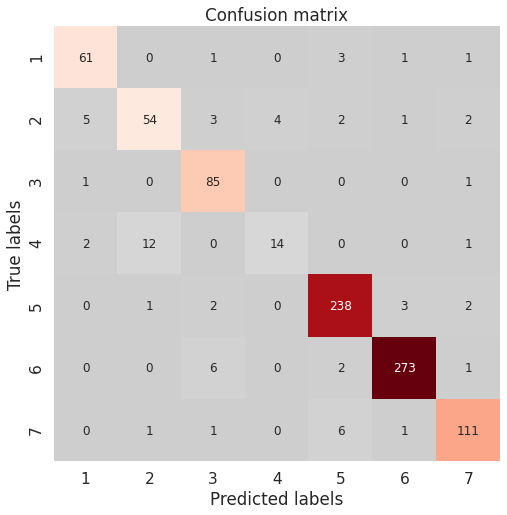

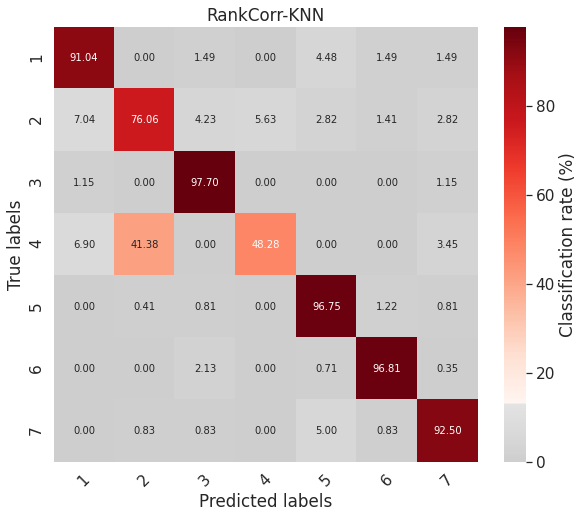

Accuracy: 0.926829268292683: Misclassification: 0.07317073170731703
              precision    recall  f1-score   support

           1       0.88      0.91      0.90        67
           2       0.79      0.76      0.78        71
           3       0.87      0.98      0.92        87
           4       0.78      0.48      0.60        29
           5       0.95      0.97      0.96       246
           6       0.98      0.97      0.97       282
           7       0.93      0.93      0.93       120

    accuracy                           0.93       902
   macro avg       0.88      0.86      0.86       902
weighted avg       0.93      0.93      0.92       902



In [19]:
sf.run_classifiers(obj, group_by="labels0", genes=selectedGenes, classifier="KNN", balance=True, title="RankCorr-KNN")

#### Heatmap selected genes

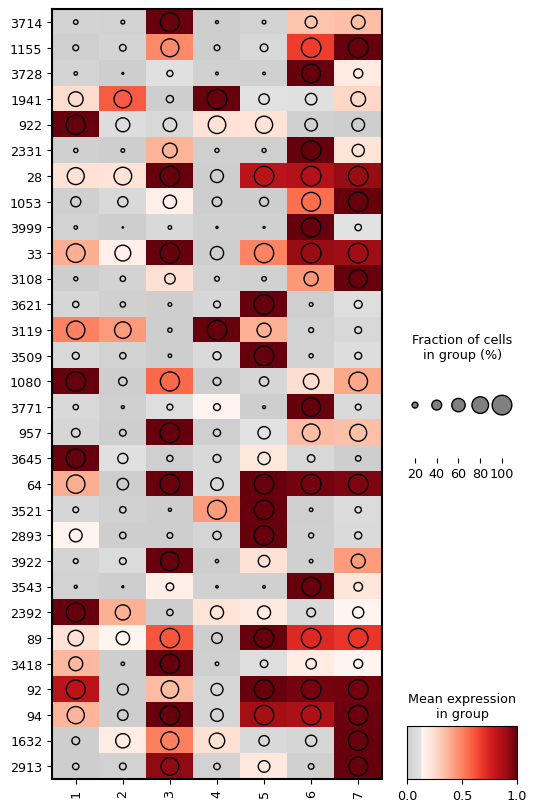

In [20]:
matplotlib.rcdefaults()
matplotlib.rcParams.update({'font.size': 11})
ax = sc.pl.DotPlot(obj,
                   selectedGenes,
                   groupby="labels0",
                   standard_scale='var',
                   use_raw=True,
                   figsize=(6,10),
                   linewidths=2).style(cmap=mymap, color_on='square', grid=True, dot_edge_lw=1)
ax.swap_axes(swap_axes=True)
# ax.show()

ax.savefig("Figures/RankCorr_top30.pdf")

# Elapsed time

In [21]:
print("%d genes across %s cells"%(obj.n_vars, obj.n_obs))

4000 genes across 3005 cells


In [22]:
print('Elapsed time (s): ', e-s)

Elapsed time (s):  1.671323299407959
